---

# **Proyecto: Predicción de Abandono de Clientes**

# **Objetivo:**
## El objetivo de este proyecto es construir y evaluar varios modelos de clasificación para predecir si un cliente de una compañía de telecomunicaciones abandonará o no el servicio (churn).


---

# 0. **Configuración Inicial e Importación de Librerías**

## En esta sección, importaremos todas las librerías necesarias para el proyecto. Es una buena práctica tener todas las importaciones en la primera celda.


In [1]:
# Para manipulación de datos
import pandas as pd
import numpy as np

# Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para preprocesamiento
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Para modelado
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

# Para evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, recall_score

# Configuraciones adicionales para una mejor visualización
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
# Ignorar warnings para una salida más limpia (opcional)
import warnings
warnings.filterwarnings('ignore')

# **Información del Dataset**

Utilizaremos el conjunto de datos "Telco Customer Churn". Este conjunto de datos contiene información demográfica de los clientes, los servicios que han contratado, información de su cuenta y si finalmente abandonó o no la compañía.

* **train.csv**: Datos para entrenar sus modelos. Incluye la variable objetivo Churn.
* **test.csv:** Datos para generar las predicciones. No incluye la variable Churn.

#  **1. Carga de Datos**

## Cargar los datasets proporcionado: `train.csv`, `test.csv`


In [2]:
# Montar la unidad
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
try:
    train_df = pd.read_csv('/content/drive/MyDrive/TP1/train.csv') # Usaremos este dataset para el entrenamiento, validación de los modelos y re-entrenamiento final
    test_df = pd.read_csv('/content/drive/MyDrive/TP1/test.csv') # Usaremos este dataset para hacer las predicciones finales
except FileNotFoundError:
    print("Asegúrate de que los archivos .csv estén en el mismo directorio que este cuaderno.")

    exit()

# **2. Análisis Exploratorio de Datos (EDA)**

## En esta fase, exploraremos el dataset de entrenamiento para entender mejor nuestros datos, encontrar patrones, identificar valores faltantes y visualizar relaciones entre las características y la variable objetivo (`Churn`).


In [4]:
# Imprimimos el dataset para un primer reconocimiento de las variables

print("Forma del dataset de entrenamiento:", train_df.shape)
print("Forma del dataset de prueba:", test_df.shape)

print("\nPrimeras 5 filas del dataset de entrenamiento:")
display(train_df.head(5))
display(test_df.head(5))

# Imprimimos el % de la variable objetivo para ver el desbalanceo del dataset
print('\n' + "="*50 + "\n")
print(train_df['Churn'].value_counts(normalize=True) * 100)

Forma del dataset de entrenamiento: (5634, 21)
Forma del dataset de prueba: (1409, 20)

Primeras 5 filas del dataset de entrenamiento:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.70,No
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,No


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,4376-KFVRS,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8468.20
1,2754-SDJRD,Female,1,No,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.15,908.55
2,9917-KWRBE,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),78.35,3211.20
3,0365-GXEZS,Male,0,Yes,No,18,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,78.20,1468.75
4,9385-NXKDA,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),82.65,5919.35




Churn
No     73.464679
Yes    26.535321
Name: proportion, dtype: float64


## 2.1 Exploración y Análisis de Datos

In [5]:
# Para conocer los tipos de datos de las distintas variables

print("\nInformación del dataset:\n")
train_df.info()


Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBillin

# 2.2 Estadísticas Descriptivas

In [6]:
# Breve resúmen estadístico de las variables numéricas del dataset

print("Descripción estadística:\n")
print(train_df.describe())

Descripción estadística:

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    5634.000000  5634.000000     5634.000000   5634.000000
mean        0.163294    32.485091       64.929961   2301.319027
std         0.369667    24.568744       30.138105   2277.809211
min         0.000000     0.000000       18.400000     18.850000
25%         0.000000     9.000000       35.662500    408.850000
50%         0.000000    29.000000       70.500000   1397.475000
75%         0.000000    55.000000       90.000000   3835.825000
max         1.000000    72.000000      118.750000   8684.800000


In [7]:
# Para saber si hay valores nulos o faltantes

print("Valores nulos por columna:\n")
print(train_df.isnull().sum())

Valores nulos por columna:

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


*2.2.0 Matriz de correlación*

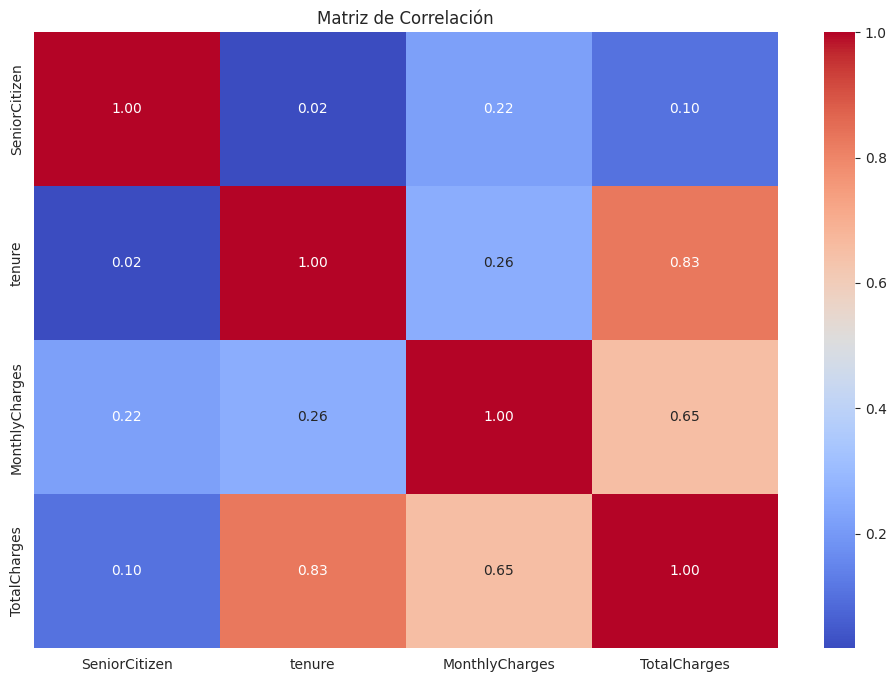

In [8]:
# Matriz para ver como correlacionan algunas de las variables con a variable objetivo

plt.figure(figsize=(12, 8))
correlation_matrix = train_df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Corremos una correlación de dummies sobre un muestreo del dataset para ver cuáles tienen más peso sobre el Churn y ver en que variables nos centramos para el análisis

In [9]:


df_sample = train_df.sample(frac=0.6, random_state=42)
df_dummy = pd.get_dummies(df_sample, drop_first=True)
top_relevancia = df_dummy.corr()['Churn_Yes'].abs().sort_values(ascending=False)
print(top_relevancia.head(15))

Churn_Yes                               1.000000
tenure                                  0.349037
InternetService_Fiber optic             0.317862
PaymentMethod_Electronic check          0.307010
Contract_Two year                       0.294152
StreamingMovies_No internet service     0.217641
OnlineBackup_No internet service        0.217641
TechSupport_No internet service         0.217641
StreamingTV_No internet service         0.217641
OnlineSecurity_No internet service      0.217641
InternetService_No                      0.217641
DeviceProtection_No internet service    0.217641
PaperlessBilling_Yes                    0.201802
MonthlyCharges                          0.195465
TotalCharges                            0.195317
Name: Churn_Yes, dtype: float64


## *2.2.1 Explorar la variable 'Tenure'*


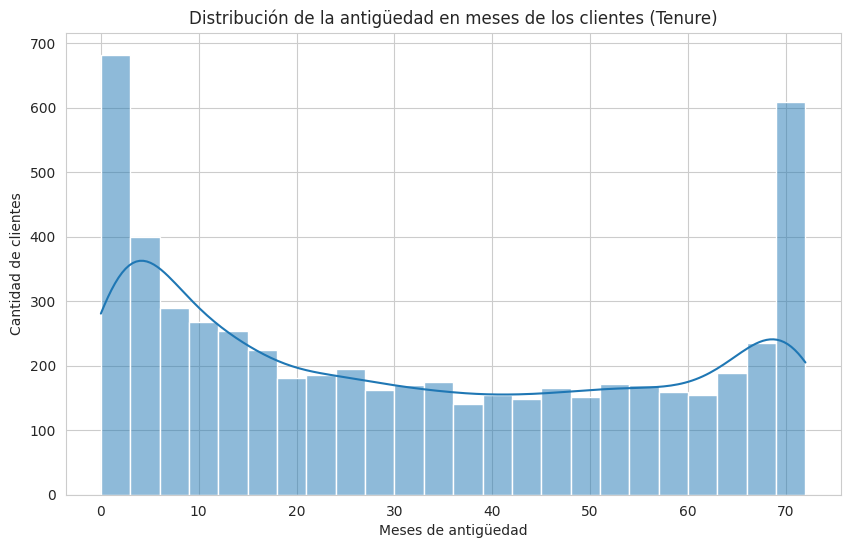

In [10]:
# Distribución de la variable Tenure (meses de permanencia de cada cliente en la compañía)

sns.histplot(x='tenure', bins=24, data=train_df, kde=True)
plt.title("Distribución de la antigüedad en meses de los clientes (Tenure)")
plt.xlabel("Meses de antigüedad")
plt.ylabel("Cantidad de clientes")
plt.show()

Podemos observar que hay mucha cantidad de clientes nuevos (entre 0 y 3 meses) y muchos con antigüedad mayor a 70 meses
sin embargo la mediana se encuentra aproximadamente en 29 meses (son aproximadamente 2 años, el tipo de contrato más largo que
ofrece la compañía

## *2.2.2 Exploración de la variable 'Monthly Charges'*

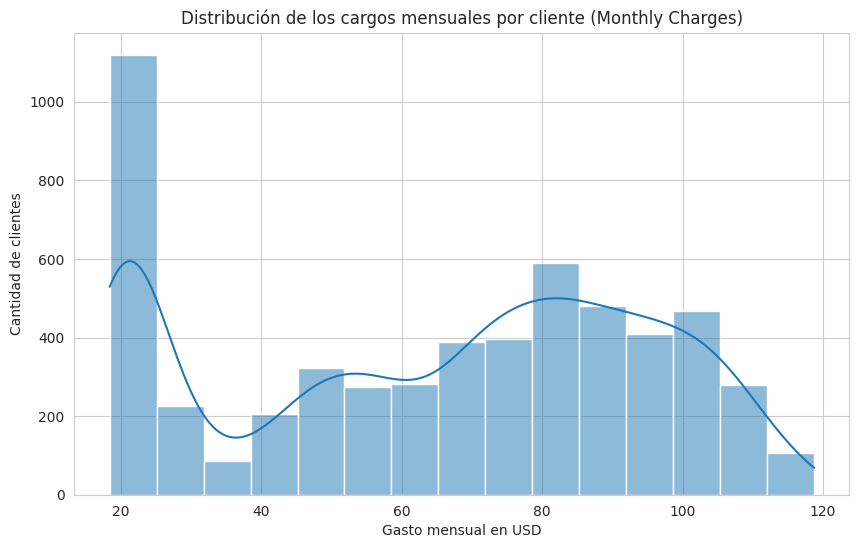

In [11]:
# Distribución de la variable Monthly Charges (Gasto mensual por cliente)

sns.histplot(x='MonthlyCharges', bins=15, data=train_df, legend=False, kde=True)
plt.title("Distribución de los cargos mensuales por cliente (Monthly Charges)")
plt.xlabel("Gasto mensual en USD")
plt.ylabel("Cantidad de clientes")
plt.show()

Si bien se observan muchos clientes con abonos mensuales de bajo precio esto puede ser producto de que son clientes nuevos que entran con precios promocionables. Sin embargo, se detectan muchos otros clientes con con gastos mensuales que pueden llegar a los usd 118.75. La mediana de gastos se encuentra en una gasto mensual de usd 70.50.

## *2.2.3 Porcentaje de Churn por Tipo de Contrato*

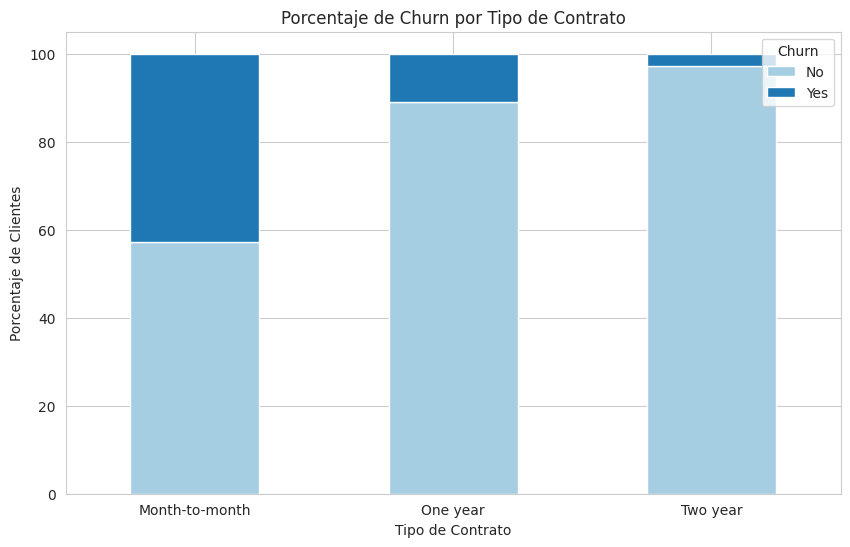

In [12]:
contract_churn = pd.crosstab(train_df['Contract'], train_df['Churn'], normalize='index') * 100

contract_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#a6cee3', '#1f78b4'])
plt.title('Porcentaje de Churn por Tipo de Contrato')
plt.ylabel('Porcentaje de Clientes')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

En este gráfico se puede observar que dividido por tipo de contrato, en los contratos que son mes a mes es donde mayor porcentaje de abandono de clientes se producen, siendo muy bajo este porcentaje cuando los contratos son mayores a un año.

## *2.2.4 Porcentaje de abandono por tipo de servicio de internet*

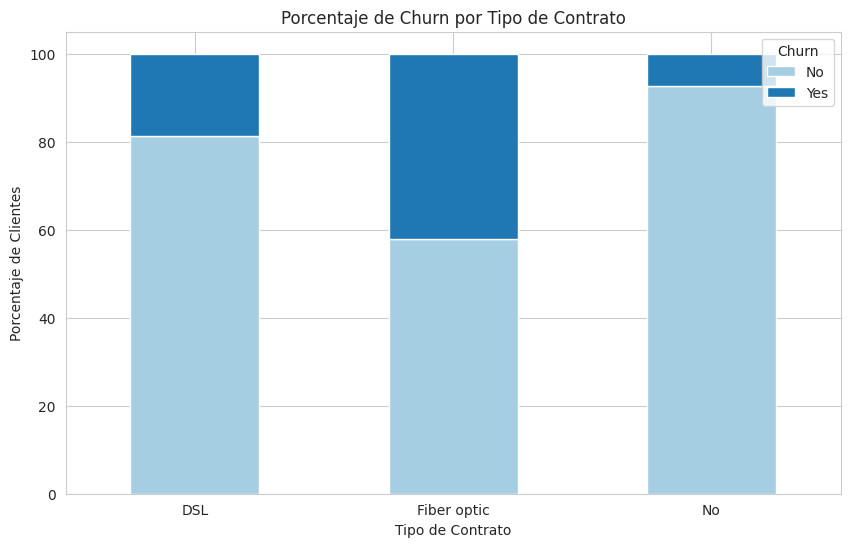

In [13]:
contract_churn = pd.crosstab(train_df['InternetService'], train_df['Churn'], normalize='index') * 100

contract_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#a6cee3', '#1f78b4'])
plt.title('Porcentaje de Churn por Tipo de Contrato')
plt.ylabel('Porcentaje de Clientes')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

En este gráfico podemos observar que dividido por servicio de internet, el mayor porcentaje de abandono se da en el caso de los clientes que tienen fibra óptica, lo que puede estar indicando problemas con el servicio o un gasto muy alto en la contratación del mismo.

## *2.2.5 Pairplot*

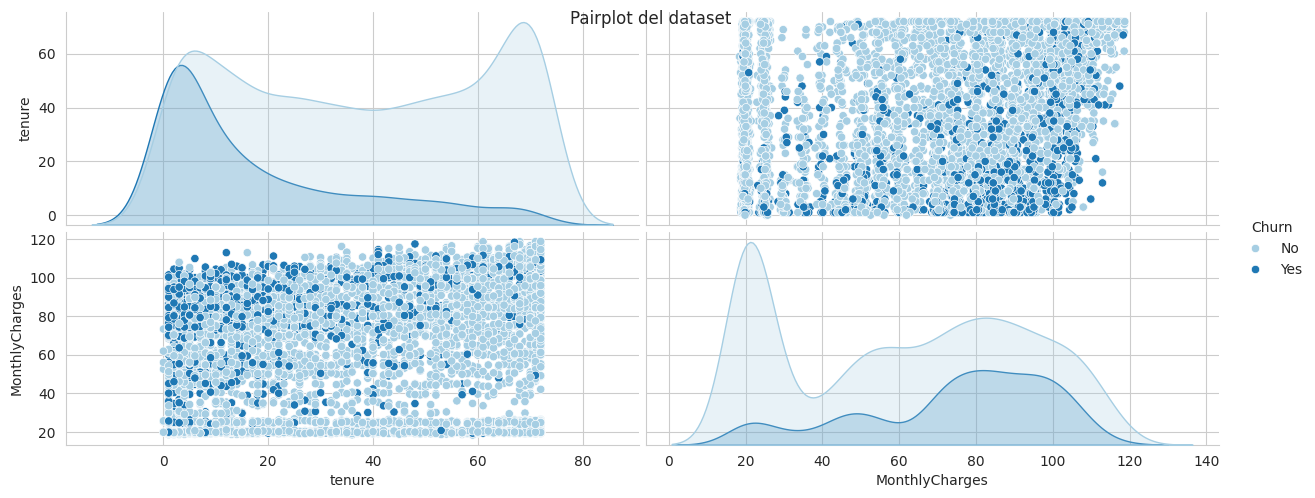

In [14]:
# Comparación de pares de variables Tenure y Monthly

subplot_height = 2.5
aspect_ratio = 2.5
sns.pairplot(train_df, vars=['tenure', 'MonthlyCharges'], hue='Churn', palette='Paired', height=subplot_height, aspect=aspect_ratio)
plt.suptitle('Pairplot del dataset')
plt.show()


En este pairplot se puede observar que se producen muchos abandonos de clientes cuando recién contratan el servicio y tienen un gasto mensual mayor a la mediana de usd 70.50.

## *2.2.6 Boxplot*

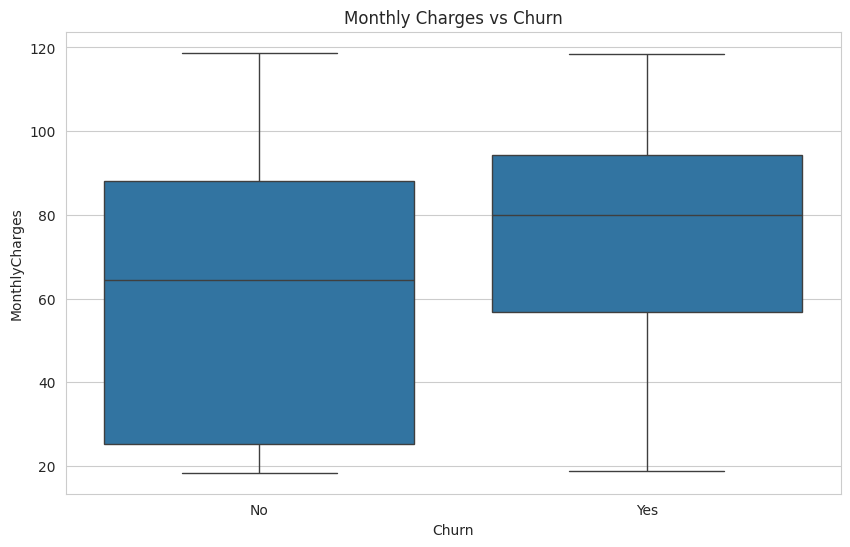

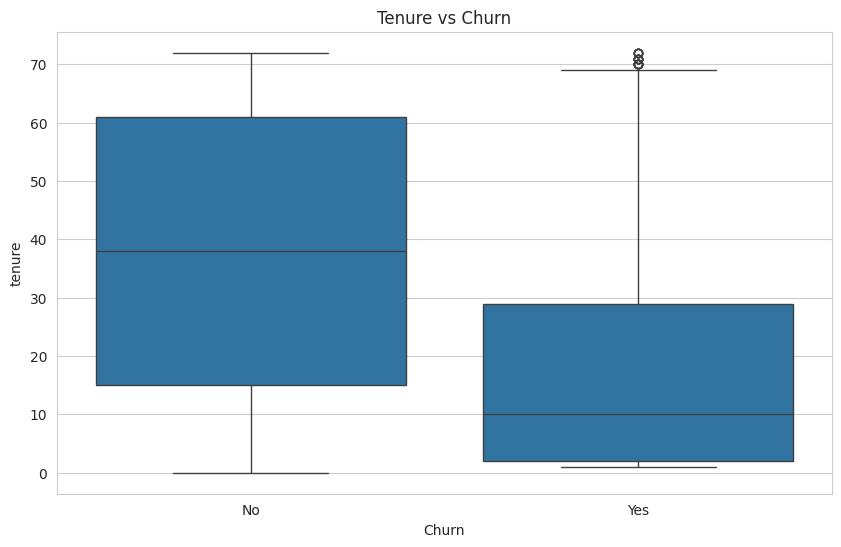

In [15]:
#Relación Monthly Charges vs Churn

sns.boxplot(x='Churn', y='MonthlyCharges', data=train_df)
plt.title('Monthly Charges vs Churn')
plt.show()

sns.boxplot(x='Churn', y='tenure', data=train_df)
plt.title('Tenure vs Churn')
plt.show()


En estos gráficos de boxplot se puede detectar que los clientes que abandonan la empresa suelen tener facturas mensuales mas caras y llevan menos tiempo en la compañía en relación con quienes no abandonaron.

## *2.2.6 Scatterplot*

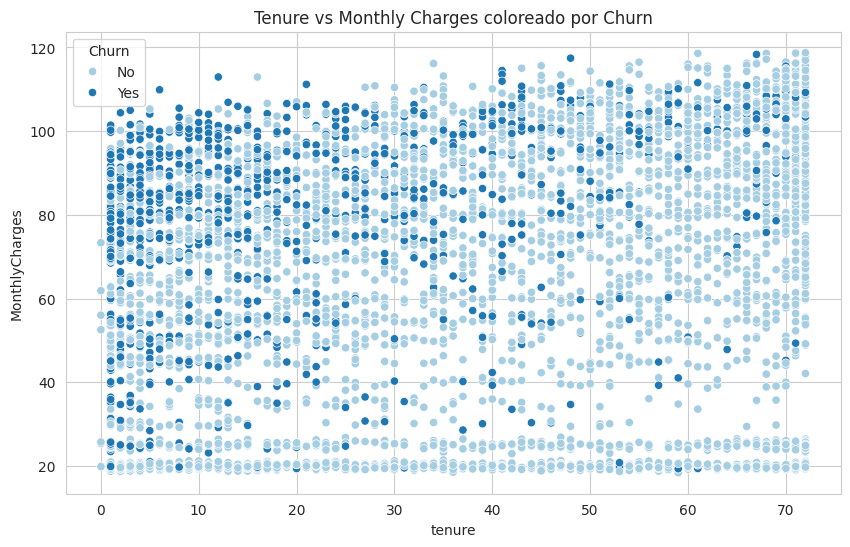

In [16]:
# Relación Tenure vs Monthly Charges coloreado por Churn

sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=train_df, palette='Paired', alpha=1)
plt.title('Tenure vs Monthly Charges coloreado por Churn')
plt.show()

# **3. Preprocesamiento de Datos**

## Prepararemos los datos para que puedan ser utilizados por los modelos de Machine Learning.

## *3.1 Codificación de Variables Categóricas*

In [17]:
train_df['churn_num'] = train_df['Churn'].map({'No': 0, 'Yes': 1})
encoder = OneHotEncoder(drop='first', sparse_output=False)
columnas_cat = ['InternetService', 'PaymentMethod', 'Contract']
encoded_array = encoder.fit_transform(train_df[columnas_cat])
df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(columnas_cat), index=train_df.index)
train_df_enc = pd.concat([train_df.drop(columnas_cat, axis=1), df_encoded], axis=1)

display(train_df_enc.select_dtypes(include=['number']))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,churn_num,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,0,35,49.20,1701.65,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,15,75.10,1151.55,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,13,40.55,590.35,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0,26,73.50,1905.70,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,1,44.55,44.55,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0,71,109.25,7707.70,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5630,0,2,46.05,80.35,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5631,1,25,102.80,2660.20,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5632,0,24,20.40,482.80,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [18]:
# Si Contract_One year y Contract_Two year son 0, entonces es Month-to-month
train_df_enc['Is_MonthToMonth'] = ((train_df_enc['Contract_One year'] == 0) &
                                   (train_df_enc['Contract_Two year'] == 0)).astype(int)

In [19]:
train_df_enc['Int_Costo_Mensual'] = train_df_enc['MonthlyCharges'] * train_df_enc['Is_MonthToMonth']
train_df_enc['Int_Fibra_Nuevo'] = train_df_enc['tenure'] * train_df_enc['InternetService_Fiber optic']

print(train_df_enc[['Int_Fibra_Nuevo', 'Int_Costo_Mensual']].head())


   Int_Fibra_Nuevo  Int_Costo_Mensual
0              0.0              49.20
1             15.0              75.10
2              0.0               0.00
3              0.0               0.00
4              0.0              44.55


# **4. Modelado y Evaluación**

## Ahora entrenaremos y evaluaremos los tres modelos requeridos:
## Regresión Logística, k-NN y Naive Bayes.


## 4.1 Separamos caracterísitas (X) y objetivo (y)

In [20]:
# Lista de columnas base que quieres mantener
base_features = ['tenure', 'MonthlyCharges']

# Lista de columnas generadas por OneHotEncoder
cat_features = [col for col in train_df_enc.columns if 'Contract_' in col or 'PaymentMethod_' in col or 'InternetService_' in col]

# Tus nuevas interacciones manuales
interacciones = ['Int_Costo_Mensual', 'Int_Fibra_Nuevo']

X = train_df_enc[base_features + cat_features + interacciones]
y = train_df_enc['churn_num']

print('Primeras filas de X:\n')
print(X.head())
print('\nPrimeras filas de y:\n')
print(y.head())
X.info()


Primeras filas de X:

   tenure  MonthlyCharges  InternetService_Fiber optic  InternetService_No  \
0      35           49.20                          0.0                 0.0   
1      15           75.10                          1.0                 0.0   
2      13           40.55                          0.0                 0.0   
3      26           73.50                          0.0                 0.0   
4       1           44.55                          0.0                 0.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    1.0                             0.0   
4                                    0.0                             1.0   

   PaymentMethod_Mailed check  Contract_One year  Co

## 4.2 Separación de datos de entrenamiento y test

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [22]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (4507, 11), y_train shape: (4507,)
X_test shape: (1127, 11), y_test shape: (1127,)


## 4.3 Escalado de características

In [23]:
# Escalamos las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4.4 Modelado

**4.4.1 Regresión Logísitca**

In [24]:
#Entrenamos el modelo
log_reg = LogisticRegression(max_iter=1000,C=1.0,class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

*4.4.1.1 Evaluación del modelo Regresión Logística*

In [25]:
# Hacer predicción en el conjunto de prueba
y_pred_rl = log_reg.predict(X_test_scaled)

# Calcular la probabilidad de las predicciones
y_pred_proba_rl = log_reg.predict_proba(X_test_scaled)[:, 1] # Probabilidad de la clase 1 (Yes)
umbral_rl = 0.5
y_pred_rl = (y_pred_proba_rl >= umbral_rl).astype(int)

# Mostrar algunas predicciones y sus probabilidades
results_df = pd.DataFrame({'Real': y_test, 'Predicho': y_pred_rl, 'Probabilidad YES': y_pred_proba_rl})

print("Ejemplos de predicciones:\n")
print(results_df.head(10))
print('\n' + '='*50 + '\n')

# Evaluar la precisión del modelo
def print_metricas_rl():
    print(f"Accuracy: {accuracy_score(y_test, y_pred_rl):.4f}")
    print(f"Recall (Churn): {recall_score(y_test, y_pred_rl):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred_rl):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_rl):.4f}")

print_metricas_rl()




Ejemplos de predicciones:

      Real  Predicho  Probabilidad YES
4882     0         1          0.657221
515      0         0          0.059098
4694     0         0          0.092888
42       0         0          0.417064
11       0         1          0.585632
292      0         0          0.106688
3557     0         0          0.282158
1705     0         0          0.052866
2653     0         0          0.038342
230      0         1          0.527295


Accuracy: 0.7356
Recall (Churn): 0.8227
F1-Score: 0.6228
ROC AUC: 0.7634


*4.4.1.2 Matriz de confusión*

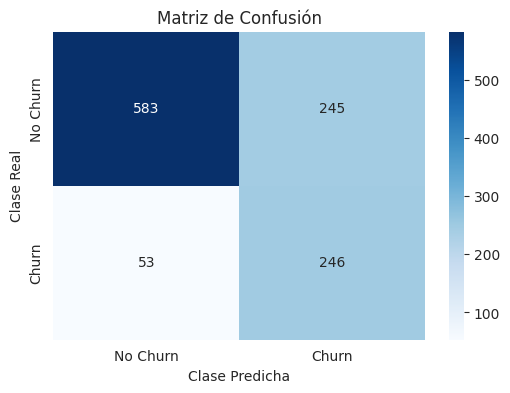

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred_rl)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.title('Matriz de Confusión')
plt.show()


**4.4.2 kNN**

In [27]:
# Creamos un clasificador KNN con k=9
k = 9
knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance')

# Entrenamos el modelo
knn_classifier.fit(X_train_scaled, y_train)

print(f'El modelo KNN fue entrenado con k = {k}')


El modelo KNN fue entrenado con k = 9


*4.4.2.1 Evaluación del modelo kNN*

In [28]:
# Hacer predicción en el conjunto de prueba
y_pred_knn = knn_classifier.predict(X_test_scaled)
y_pred_proba_knn = knn_classifier.predict_proba(X_test_scaled)[:, 1] # Probabilidad de la clase 1 (Yes)
umbral_knn = 0.3
y_pred_knn = (y_pred_proba_knn >= umbral_knn).astype(int)


# Evaluar la precisión del modelo
def print_metricas_knn():
    print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
    print(f"Recall (Churn): {recall_score(y_test, y_pred_knn):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_knn):.4f}")

print_metricas_knn()

Accuracy: 0.7453
Recall (Churn): 0.6990
F1-Score: 0.5929
ROC AUC: 0.7305


*4.4.2.2 Informe de clasificación + Matriz de Confusión*

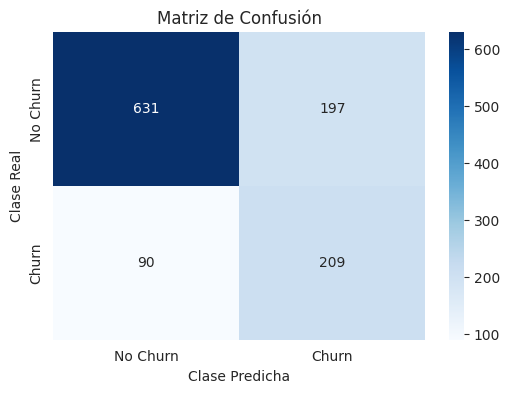

In [29]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.title('Matriz de Confusión')
plt.show()

*4.4.2.3 Búsqueda de otro valor de K*

Precisión con k = 1: 0.7453
Precisión con k = 3: 0.7453
Precisión con k = 5: 0.7453
Precisión con k = 7: 0.7453
Precisión con k = 9: 0.7453
Precisión con k = 11: 0.7453
Precisión con k = 13: 0.7453
Precisión con k = 15: 0.7453
Precisión con k = 17: 0.7453
Precisión con k = 19: 0.7453
Precisión con k = 21: 0.7453
Precisión con k = 23: 0.7453
Precisión con k = 25: 0.7453
Precisión con k = 27: 0.7453
Precisión con k = 29: 0.7453
Precisión con k = 31: 0.7453
Precisión con k = 33: 0.7453
Precisión con k = 35: 0.7453
Precisión con k = 37: 0.7453
Precisión con k = 39: 0.7453
Precisión con k = 41: 0.7453
Precisión con k = 43: 0.7453
Precisión con k = 45: 0.7453
Precisión con k = 47: 0.7453
Precisión con k = 49: 0.7453


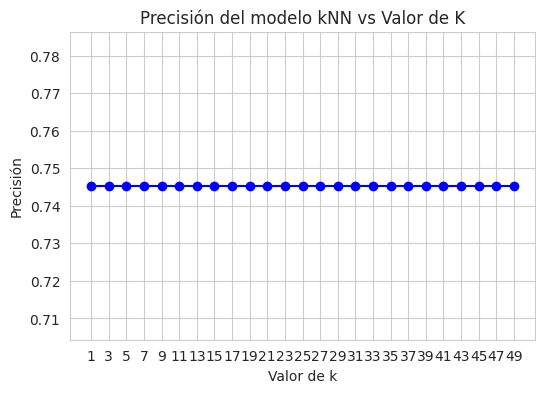

In [30]:
k_values = range(1, 51, 2) # k impares de 1 a 49
accuracies = []

for k_val in k_values:
  knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
  knn.fit(X_train_scaled, y_train)
  y_pred_k = knn.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred_knn)
  accuracies.append(accuracy)
  print(f'Precisión con k = {k_val}: {accuracy:.4f}')

plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Precisión del modelo kNN vs Valor de K')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.xticks(k_values)
plt.grid(True)
plt.show()

**4.4.3 Naive-Bayes**

In [31]:
# Entrenamos el modelo
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

*4.4.3.1 Evaluación del modelo Naive-Bayes*

In [32]:
y_pred_gnb = gnb.predict(X_test)
y_pred_proba_gnb = gnb.predict_proba(X_test_scaled)[:,1] # Probabilidad de la clase 1 (Yes)
umbral_gnb = 0.5
y_pred_gnb = (y_pred_proba_gnb >= umbral_gnb).astype(int)

# Evaluar la precisión del modelo
def print_metricas_gnb():
    print(f"Accuracy: {accuracy_score(y_test, y_pred_gnb):.4f}")
    print(f"Recall (Churn): {recall_score(y_test, y_pred_gnb):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred_gnb):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_gnb):.4f}")

print_metricas_gnb()

Accuracy: 0.7347
Recall (Churn): 0.0000
F1-Score: 0.0000
ROC AUC: 0.5000


*4.4.3.2 Matriz de confusión*

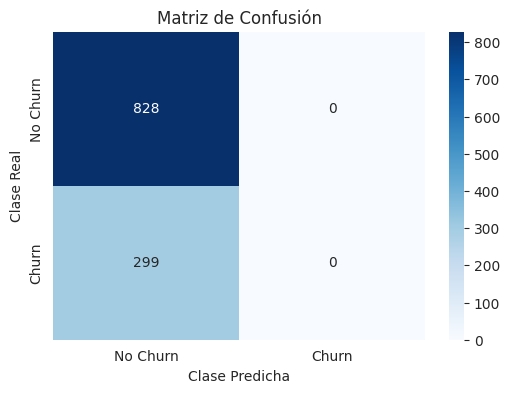

In [33]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_gnb)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.title('Matriz de Confusión')
plt.show()

**4.4.4 Resumen de métricas de los 3 modelos**

In [34]:
print('MÉTRICAS DEL MODELO REGRASIÓN LOGÍSTICA:\n')
print_metricas_rl()
print('\n' + '='*35 + '\n')
print('MÉTRICAS DEL MODELO kNN:\n')
print_metricas_knn()
print('\n' + '='*35 + '\n')
print('MÉTRICAS DEL MODELO NAIVE-BAYES:\n')
print_metricas_gnb()

MÉTRICAS DEL MODELO REGRASIÓN LOGÍSTICA:

Accuracy: 0.7356
Recall (Churn): 0.8227
F1-Score: 0.6228
ROC AUC: 0.7634


MÉTRICAS DEL MODELO kNN:

Accuracy: 0.7453
Recall (Churn): 0.6990
F1-Score: 0.5929
ROC AUC: 0.7305


MÉTRICAS DEL MODELO NAIVE-BAYES:

Accuracy: 0.7347
Recall (Churn): 0.0000
F1-Score: 0.0000
ROC AUC: 0.5000


#  **5. Selección de Modelo**

## Basado en tus resultados de validación, elige el mejor modelo . Luego, re-entrénalo usando **todos los datos de `train.csv`** y úsalo para hacer predicciones sobre `test.csv`.


Basado en nuestros resultados de validación elegiremos el modelo de Regresión Logísitca ya que es el que mejores valores de Recall nos devuelve. En el caso que estamos analizando consideramos que es más acertado perder un poco de precisión en pos de detectar la mayor cantidad de clientes que abandonan la compañía para poder realizar las acciones necesarias para retenerlos. El objetivo es que el modelo tenga la mínima cantidad posible de Falsos Negativos.

In [35]:
# Elegimos el modelo de Regeresión Logística, para eso volvemos a escalar las variables sin hacer un split ya que usaremos todo el dataset train_df para re-entrenar el modelo.
X_scaled = scaler.fit_transform(X)

#Re-entrenamos el modelo
log_reg_final = LogisticRegression(max_iter=1000,C=1.0,class_weight='balanced')
log_reg_final.fit(X_scaled, y)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [36]:
# Aplicamos las mismas transformaciones que usamos en el archivo train_df para el dataset test_df
test_df['billing_num'] = test_df['PaperlessBilling'].map({'Yes': 0, 'No': 1})
test_df['security_num'] = test_df['OnlineSecurity'].map({'Yes': 0, 'No': 1, 'No internet service': 2})
test_df['backup_num'] = test_df['OnlineBackup'].map({'Yes': 0, 'No': 1, 'No internet service': 2})
test_df['support_num'] = test_df['TechSupport'].map({'Yes': 0, 'No': 1, 'No internet service': 2})
test_df['payment_num'] = test_df['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1, 'Credit card (automatic)': 2, 'Bank transfer (automatic)': 3})
test_df['contr_num'] = test_df['Contract'].map({'Month-to-month': 0, 'Two year': 1, 'One year': 2})
test_df['inter_serv'] = test_df['InternetService'].map({'DSL': 0, 'Fiber optic': 1, 'No': 2})



In [37]:
# Preparamos el archivo test_df para que tenga las mismas columnas y el mismo orden que el train_df
X_test_final = test_df[['tenure', 'inter_serv', 'contr_num', 'payment_num', 'MonthlyCharges']]
X_test_final = X_test_final.reindex(columns=X.columns, fill_value=0)

# Escalamos el test_df
X_test_final_scaled = scaler.transform(X_test_final)

# Hacemos las predicciones y utilizamos el mismo umbral utilizado cuando entrenamos el modelo
y_pred_final = log_reg_final.predict(X_test_final_scaled)
y_pred_proba_final = log_reg_final.predict_proba(X_test_final_scaled)[:,1]
umbral_final = 0.3
y_pred_final = (y_pred_proba_final >= umbral_final).astype(int)

# Mostrar algunas predicciones y sus probabilidades
results_df_final = pd.DataFrame({'Predicho': y_pred_final, 'Probabilidad YES': y_pred_proba_final})

print("Ejemplos de predicciones:\n")
print(results_df_final.head(10))
print('\n' + '='*50 + '\n')

# Guardar en un CSV para entregar o revisar
test_df['Prediccion_Churn'] = y_pred_final
test_df.to_csv('mis_predicciones.csv', index=False)



Ejemplos de predicciones:

   Predicho  Probabilidad YES
0         1          0.443529
1         1          0.797715
2         1          0.554862
3         1          0.700503
4         1          0.358558
5         1          0.733411
6         1          0.731862
7         1          0.552556
8         0          0.270812
9         1          0.623066




In [40]:
# Imprimimos el archivo .csv para corroborar que se creó correctamente
predicciones_df = pd.read_csv('mis_predicciones.csv')
display(predicciones_df.head(5))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,billing_num,security_num,backup_num,support_num,payment_num,contr_num,inter_serv,Prediccion_Churn
0,4376-KFVRS,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,114.05,8468.20,0,0,0,0,2,1,1,1
1,2754-SDJRD,Female,1,No,No,8,Yes,Yes,Fiber optic,No,...,100.15,908.55,0,1,1,0,2,0,1,1
2,9917-KWRBE,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,...,78.35,3211.20,0,0,0,1,2,2,0,1
3,0365-GXEZS,Male,0,Yes,No,18,Yes,No,Fiber optic,No,...,78.20,1468.75,1,1,1,0,0,0,1,1
4,9385-NXKDA,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,...,82.65,5919.35,0,0,0,1,2,1,0,1
